In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [41]:
data = pd.read_csv('/content/sample_data/data.csv')

In [42]:
data.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130,132,0,2,185,0,0.0,?,?,?,0
1,29,1,2,120,243,0,0,160,0,0.0,?,?,?,0


In [43]:
'''
sex : 1 = Male, 0 = Female (Binary)
(cp) chest pain [type (4 values, Ordinal)]: 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
(trestbps) resting blood pressure (#)
(chol) serum cholestoral in mg/dl (#)
(fbs) fasting blood sugar > 120 mg/dl (Binary) [1 = true; 0 = false]
(restecg) resting electrocardiographic results [values 0,1,2]
(thalach) maximum heart rate achieved (#)
(exang) exercise induced angina (Binary) [1 = yes; 0 = no]
(oldpeak) = ST depression induced by exercise relative to rest (#)
(slope) of the peak exercise ST segment (Ordinal) [ 1: upsloping, 2: flat , 3: downsloping)
(ca) number of major vessels (0-3, Ordinal) colored by fluoroscopy
(thal) maximum heart rate achieved (Ordinal) [3 = normal; 6 = fixed defect; 7 = reversable defect]
'''

'\nsex : 1 = Male, 0 = Female (Binary)\n(cp) chest pain [type (4 values, Ordinal)]: 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic\n(trestbps) resting blood pressure (#)\n(chol) serum cholestoral in mg/dl (#)\n(fbs) fasting blood sugar > 120 mg/dl (Binary) [1 = true; 0 = false]\n(restecg) resting electrocardiographic results [values 0,1,2]\n(thalach) maximum heart rate achieved (#)\n(exang) exercise induced angina (Binary) [1 = yes; 0 = no]\n(oldpeak) = ST depression induced by exercise relative to rest (#)\n(slope) of the peak exercise ST segment (Ordinal) [ 1: upsloping, 2: flat , 3: downsloping)\n(ca) number of major vessels (0-3, Ordinal) colored by fluoroscopy\n(thal) maximum heart rate achieved (Ordinal) [3 = normal; 6 = fixed defect; 7 = reversable defect]\n'

OldPeak(ST depression induced by exercise relative to rest) and CP ( Chest Pain Type ) have the most correlation with target ( diagnosis of heart disease)

In [44]:
data.rename(columns={'num       ': 'result'}, inplace=True)

In [45]:
data=data.replace('?',0)
data.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,result
0,28,1,2,130,132,0,2,185,0,0.0,0,0,0,0
1,29,1,2,120,243,0,0,160,0,0.0,0,0,0,0


In [46]:
x = data.drop('result',axis=1)
y = data['result']

In [47]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10) #80% Train and 20% Test Data

In [67]:
tf.random.set_seed(22)

model=tf.keras.Sequential([
    tf.keras.layers.Dense(200, activation = 'relu6'),
    tf.keras.layers.Dense(150, activation = 'relu'),
    tf.keras.layers.Dense(110, activation = 'relu'),
    tf.keras.layers.Dense(1, activation= 'sigmoid')])

model.compile(loss = tf.keras.losses.BinaryFocalCrossentropy(),
              optimizer = tf.keras.optimizers.Adagrad(learning_rate = 0.001),
              metrics =['mae'])

model.fit(x_train, y_train, epochs =100, verbose = 0)

model.evaluate(x_test, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1868 - mae: 0.4588 


[0.1966046541929245, 0.4644659757614136]

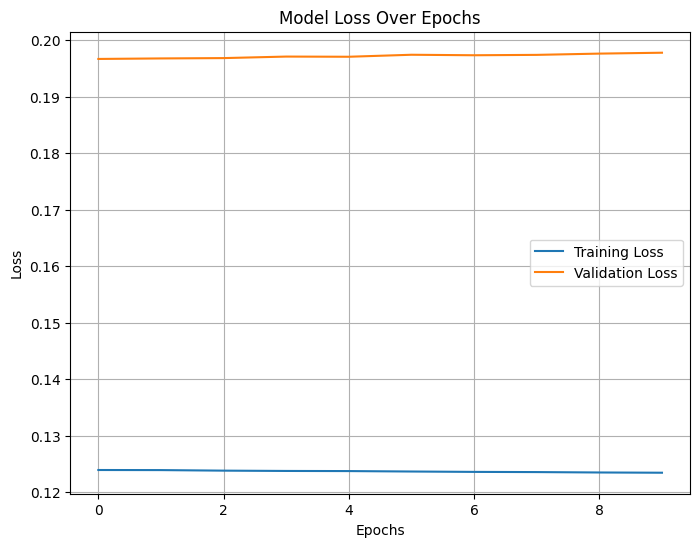

In [68]:
training_results = model.fit(x_train, y_train, epochs =10, verbose = 0, validation_data=(x_test, y_test))
plt.figure(figsize=(8, 6))
plt.plot(training_results.history['loss'], label='Training Loss')
plt.plot(training_results.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()